# Natural Gas Price Estimation & Forecasting
Analyze historical monthly natural gas prices, visualize trends, train a regression model, and forecast future prices for 12 months.


In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import numpy as np

In [2]:
# Step 2: Load the Data
df = pd.read_csv('../Task_1/Nat_Gas.csv')
df['Dates'] = pd.to_datetime(df['Dates'])
df.head()

C:\Users\dpsch\AppData\Local\Temp\ipykernel_19620\3260221222.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [3]:
df.describe()

,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


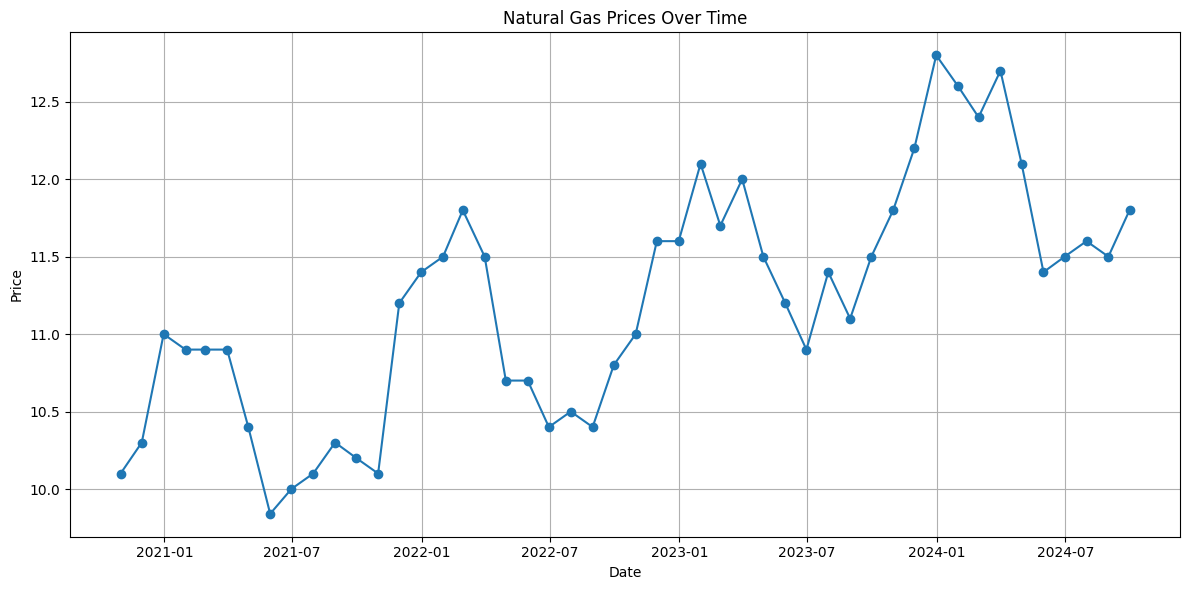

In [4]:
# Step 3: Visualize Historical Data
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', linestyle='-')
plt.title('Natural Gas Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Step 4: Train Linear Regression Model
df['Date_Ordinal'] = df['Dates'].map(datetime.toordinal)
X = df[['Date_Ordinal']]
y = df['Prices']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
# Step 5: Forecast for One Year into the Future
last_date = df['Dates'].max()
future_dates = pd.date_range(start=last_date + timedelta(days=1), end=last_date + pd.DateOffset(years=1), freq='M')
future_df = pd.DataFrame({'Dates': future_dates})
future_df['Date_Ordinal'] = future_df['Dates'].map(datetime.toordinal)
future_df['Predicted_Price'] = model.predict(future_df[['Date_Ordinal']])

C:\Users\dpsch\AppData\Local\Temp\ipykernel_17484\3663370880.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date + timedelta(days=1), end=last_date + pd.DateOffset(years=1), freq='M')


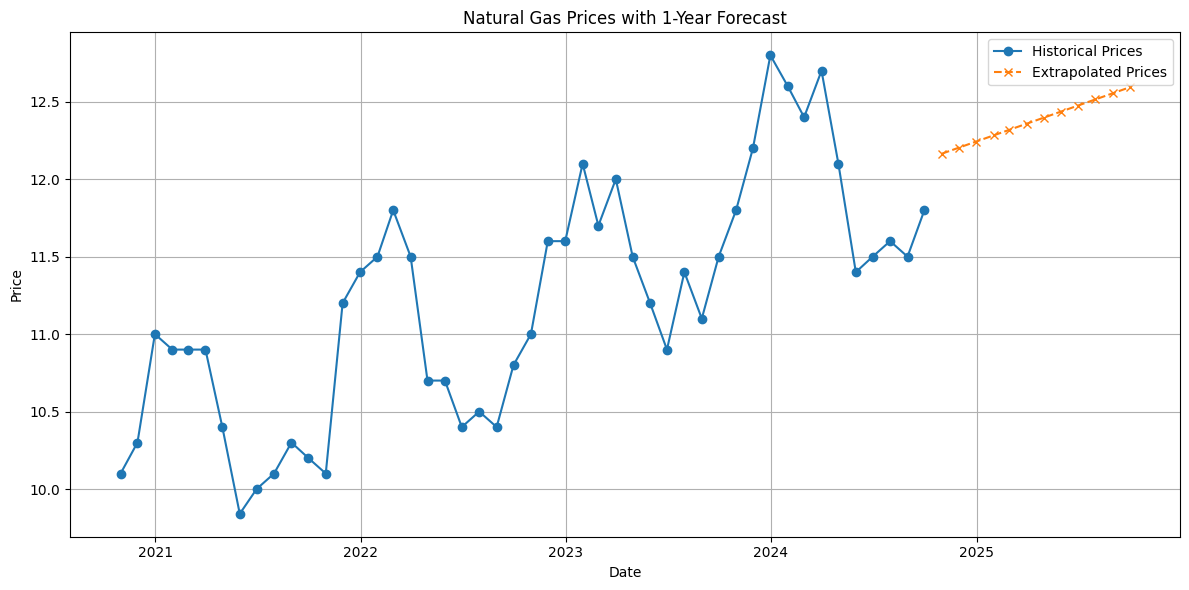

In [7]:
# Step 6: Plot Historical + Forecast Data
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_df['Dates'], future_df['Predicted_Price'], marker='x', linestyle='--', label='Extrapolated Prices')
plt.title('Natural Gas Prices with 1-Year Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Step 7: Create a Function to Estimate Price by Date
def estimate_price(date_str):
    try:
        input_date = datetime.strptime(date_str, '%Y-%m-%d')
        date_ordinal = input_date.toordinal()
        predicted_price = model.predict([[date_ordinal]])[0]
        return round(predicted_price, 2)
    except Exception as e:
        return f"Error: {e}"


In [13]:
# Example Usage
estimate_price('2025-06-15')
estimate_price('2025-08-15')

C:\Users\dpsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\dpsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(12.53)